In [1]:
####################################################################################################
# TF.USEMap
# Karl Lapo September/2015
####################################################################################################
# Map of the Western US for presentations
####################################################################################################

# must insert this statement to render the plots within the notebook
# this is specific to the ipython notebook
%matplotlib inline

## Import statements
# netcdf/numpy/xray
import numpy as np
from netCDF4 import Dataset
from datetime import datetime, timedelta
import pickle
import pandas as pd
import xray
import scipy

# OS interaction
import sys
import os

# import subplots function for plotting
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap, shiftgrid
import kgraph

#### Directory Lists
# Unix prefix
if 'linux' in sys.platform:
    dir_pre = '/home/lapok/gdrive/'
# Mac prefix
elif 'darwin' in sys.platform:
    dir_pre = '/Users/karllapo/gdrive/'
    
dir_bmap = dir_pre+'SnowHydrology/proj/TurbulenceFeedbacks/data/basemap/'
dir_print = dir_pre+'SnowHydrology/proj/TurbulenceFeedbacks/Graphics/'

/Users/karllapo/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


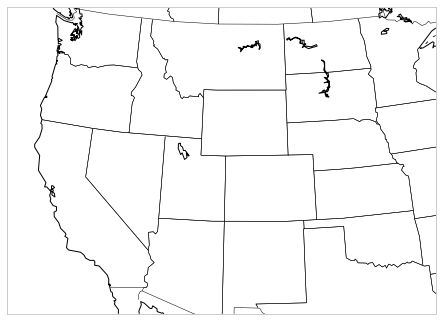

In [2]:
#####################
## Basin Shapefile ##
#####################
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch

from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep

##### Basemap
lat = np.arange(30,50,1)
lon = np.arange(-90,-125,-1)
bmp,bmd = kgraph.build_basemap(lon,lat,dir_bmap,'USA.bmp',rewrite=True)
lat_labels = bmd['lat_labels']
lon_labels = bmd['lon_labels']

## Generic map of state outlines
bmp.drawstates()
bmp.drawcoastlines()
bmp.drawcountries()

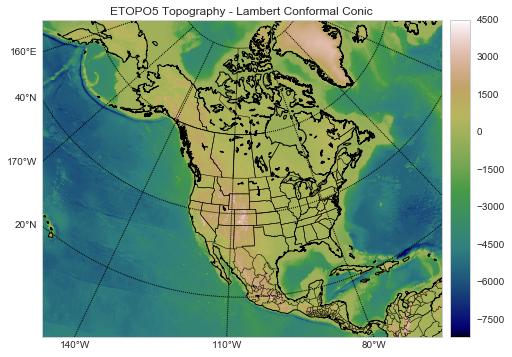

In [5]:
## Example plot from the basemap gallery

# read in etopo5 topography/bathymetry.
url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
etopodata = Dataset(url)

topoin = etopodata.variables['ROSE'][:]
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
# shift data so lons go from -180 to 180 instead of 20 to 380.
topoin,lons = shiftgrid(180.,topoin,lons,start=False)

# plot topography/bathymetry as an image.

# create the figure and axes instances.
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# setup of basemap ('lcc' = lambert conformal conic).
# use major and minor sphere radii from WGS84 ellipsoid.
m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.,urcrnrlon=-2.566,urcrnrlat=46.352,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=50.,lon_0=-107.,ax=ax)
# transform to nx x ny regularly spaced 5km native projection grid
nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)
# plot image over map with imshow.
im = m.imshow(topodat,cm.gist_earth)
# draw coastlines and political boundaries.
m.drawcoastlines()
m.drawcountries()
m.drawstates()
# draw parallels and meridians.
# label on left and bottom of map.
parallels = np.arange(0.,80,20.)
m.drawparallels(parallels,labels=[1,0,0,1])
meridians = np.arange(10.,360.,30.)
m.drawmeridians(meridians,labels=[1,0,0,1])
# add colorbar
cb = m.colorbar(im,"right", size="5%", pad='2%')
ax.set_title('ETOPO5 Topography - Lambert Conformal Conic')
plt.show()

In [ ]:
# read in etopo5 topography/bathymetry.
url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
etopodata = Dataset(url)

topoin = etopodata.variables['ROSE'][:]
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
# shift data so lons go from -180 to 180 instead of 20 to 380.
topoin,lons = shiftgrid(180.,topoin,lons,start=False)


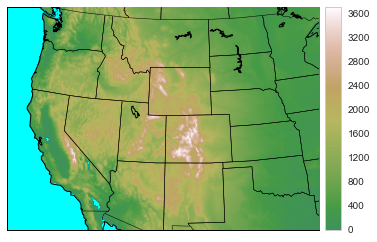

In [68]:
## Plot elevation

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = cm.gist_earth
cmap = truncate_colormap(cmap,minval=.4,maxval=1)

# create the figure and axes instances.
fig, ax = plt.subplots(1,1)

# transform to nx x ny regularly spaced 5km native projection grid
nx = int((bmp.xmax-bmp.xmin)/5000.)+1; ny = int((bmp.ymax-bmp.ymin)/5000.)+1
topodat = bmp.transform_scalar(topoin,lons,lats,nx,ny)
masked_topodat = np.ma.masked_where(topodat <= 0, topodat)

# plot image over map with imshow.
im = bmp.imshow(masked_topodat,cmap,vmin=0,zorder=1)

# draw coastlines, political boundaries, oceans
bmp.drawmapboundary(fill_color='aqua',zorder=1)
bmp.drawcoastlines()
bmp.drawcountries()
bmp.drawstates()

# add colorbar
cb = bmp.colorbar(im,"right", size="5%", pad='2%')

## Print
os.chdir(dir_print)
fig.savefig('WesternUS.Topography.pdf')
fig.savefig('WesternUS.Topography.png')

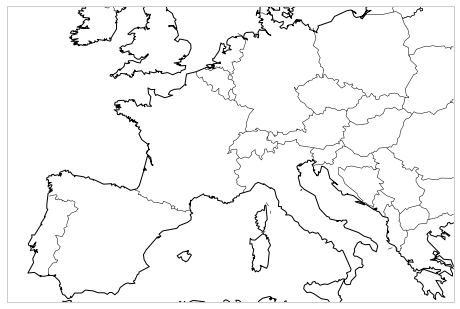

In [9]:
## Plot elevation - Europe

##### Basemap
lat = np.arange(35,55,1)
lon = np.arange(-10,30,1)
bmp,bmd = kgraph.build_basemap(lon,lat,dir_bmap,'Europe.bmp',rewrite=True)
lat_labels = bmd['lat_labels']
lon_labels = bmd['lon_labels']

## Generic map of state outlines
bmp.drawstates()
bmp.drawcoastlines()
bmp.drawcountries()


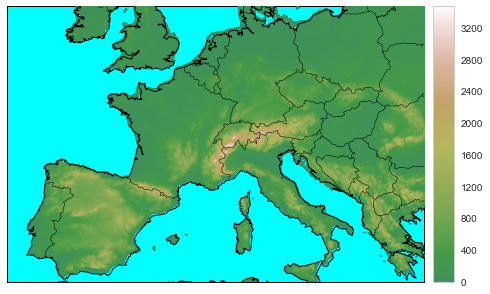

In [10]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = cm.gist_earth
cmap = truncate_colormap(cmap,minval=.4,maxval=1)

# create the figure and axes instances.
fig, ax = plt.subplots(1,1)

# transform to nx x ny regularly spaced 5km native projection grid
nx = int((bmp.xmax-bmp.xmin)/5000.)+1; ny = int((bmp.ymax-bmp.ymin)/5000.)+1
topodat = bmp.transform_scalar(topoin,lons,lats,nx,ny)
masked_topodat = np.ma.masked_where(topodat <= -10, topodat)

# plot image over map with imshow.
im = bmp.imshow(masked_topodat,cmap,vmin=0,zorder=1)

# draw coastlines, political boundaries, oceans
bmp.drawmapboundary(fill_color='aqua',zorder=1)
bmp.drawcoastlines()
bmp.drawcountries()
bmp.drawstates()

# add colorbar
cb = bmp.colorbar(im,"right", size="5%", pad='2%')

## Print
os.chdir(dir_print)
fig.savefig('Europe.Topography.pdf')
fig.savefig('Europe.Topography.png')